In [ ]:
!pip install ipython-autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=a3f8757b5a382950925dbc73de5627aa3756467daaba618968dce9372ec25773
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


In [ ]:
%load_ext autotime
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D, BatchNormalization,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import LearningRateScheduler,EarlyStopping, ModelCheckpoint
import pickle

import os
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.2.0


In [ ]:
# !cat /proc/cpuinfo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
DATA_PATH= 'drive/My Drive/MasterNU/RevisionBSLDigits/PickleData/'

In [ ]:
x = pickle.load(open(DATA_PATH+'X.pickle','rb'))
y = pickle.load(open(DATA_PATH+'y.pickle','rb'))

In [ ]:
print("Length of x: ", len(x))
print("Length of y: ", len(y))

Length of x:  10000
Length of y:  10000


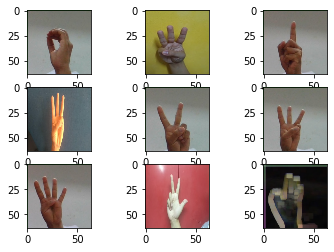

In [ ]:
# listRange = range(70, 79, 1)
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(x[i])
plt.show()

In [ ]:
y[:9]

[0, 6, 1, 6, 2, 6, 4, 3, 9]

In [ ]:
x[0].shape

(64, 64, 3)

In [ ]:
IMG_SIZE = 64

x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

y = np.array(y)

In [ ]:
x.shape

(10000, 64, 64, 3)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.2)

In [ ]:
print('xtrain shape: ', xtrain.shape)


xtrain shape:  (8000, 64, 64, 3)


In [ ]:
print('ytest shape: ', xtest.shape)

ytest shape:  (2000, 64, 64, 3)


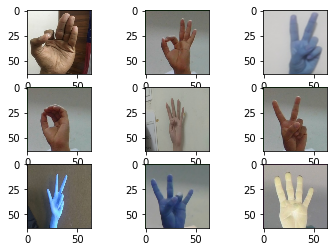

In [ ]:
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(xtrain[i])
plt.show()

In [ ]:
ytrain[:9]

array([9, 9, 2, 0, 4, 2, 3, 7, 4])

In [ ]:
# VGG16 Style Architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=xtrain.shape[1:], activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation="softmax"))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.h5"

# Call back
mc = ModelCheckpoint(filepath, monitor ='loss', verbose = 1, save_best_only=True, mode = 'max')
es = EarlyStopping(monitor='loss', patience=3, verbose=1, mode='min',restore_best_weights=True)
sheduler_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)
callbacks = [mc,es, sheduler_lr]

In [ ]:
# history = model.fit(xtrain,validation_data=xtest, batch_size=32, epochs=5, verbose=1, callbacks=callbacks)
history = model.fit(xtrain, ytrain, validation_data=(xtest,ytest), epochs=500, batch_size=32, verbose=1, callbacks=callbacks)

Epoch 1/500
247/250 [============================>.] - ETA: 0s - loss: 1.8750 - accuracy: 0.4780
Epoch 00001: loss improved from -inf to 1.86551, saving model to weights-improvement-01-0.65.h5
250/250 [==============================] - 4s 14ms/step - loss: 1.8655 - accuracy: 0.4794 - val_loss: 1.1158 - val_accuracy: 0.6535 - lr: 0.0010
Epoch 2/500
248/250 [============================>.] - ETA: 0s - loss: 0.7596 - accuracy: 0.7554
Epoch 00002: loss did not improve from 1.86551
250/250 [==============================] - 3s 13ms/step - loss: 0.7582 - accuracy: 0.7558 - val_loss: 0.6033 - val_accuracy: 0.8015 - lr: 9.0000e-04
Epoch 3/500
249/250 [============================>.] - ETA: 0s - loss: 0.4834 - accuracy: 0.8425
Epoch 00003: loss did not improve from 1.86551
250/250 [==============================] - 3s 13ms/step - loss: 0.4824 - accuracy: 0.8429 - val_loss: 0.3981 - val_accuracy: 0.8720 - lr: 8.1000e-04
Epoch 4/500
249/250 [============================>.] - ETA: 0s - loss: 0.348

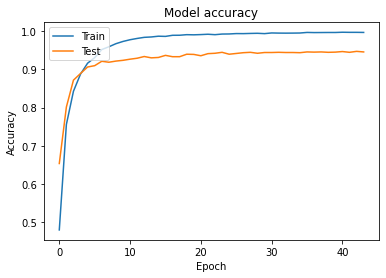

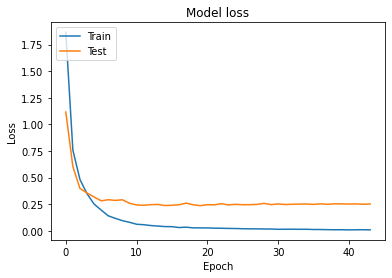

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Confusion Matrix for Testing

In [ ]:
#Confution Matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(xtest, len(xtest))
y_pred = np.argmax(Y_pred, axis=1)
# print(y_pred)
print('Confusion Matrix')
print(confusion_matrix(ytest, y_pred))
# print(val_generator.classes)
print('Classification Report')
target_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five','Six', 'Seven', 'Eight', 'Nine']
print(classification_report(ytest, y_pred, target_names=target_names))

Confusion Matrix
[[180   2   0   0   0   0   1   0   0   0]
 [  1 184   2   1   0   1   0   0   0   0]
 [  0   6 197   2   0   0   2   3   2   1]
 [  0   1   0 200   0   5   1   1   1   1]
 [  0   0   0   0 173   1   3   3   1   0]
 [  1   0   0   2   4 204   0   0   0   1]
 [  0   0   7   0   3   1 208   5   1   0]
 [  0   0   5   1   2   1   5 178   3   1]
 [  0   2   0   0   2   2   0   5 186   4]
 [  1   0   0   0   1   1   0   1   2 184]]
Classification Report
              precision    recall  f1-score   support

        Zero       0.98      0.98      0.98       183
         One       0.94      0.97      0.96       189
         Two       0.93      0.92      0.93       213
       Three       0.97      0.95      0.96       210
        Four       0.94      0.96      0.95       181
        Five       0.94      0.96      0.95       212
         Six       0.95      0.92      0.93       225
       Seven       0.91      0.91      0.91       196
       Eight       0.95      0.93      0.94

Text(0.5, 1.0, 'Confusion Matrix')

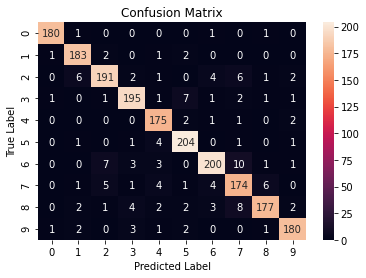

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(xtest, len(xtest))
matrix = confusion_matrix(ytest, y_pred)
sns.heatmap(matrix,annot=True,cbar=True, fmt='d')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

Text(0.5, 1.0, 'Confusion Matrix')

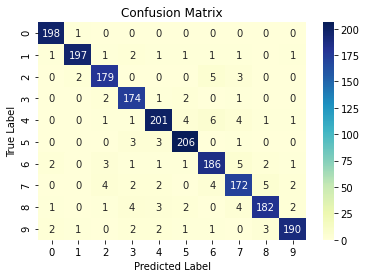

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(xtest, len(xtest))
matrix = confusion_matrix(ytest, y_pred)
sns.heatmap(matrix,annot=True,cbar=True, cmap="YlGnBu", fmt='d')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')